## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
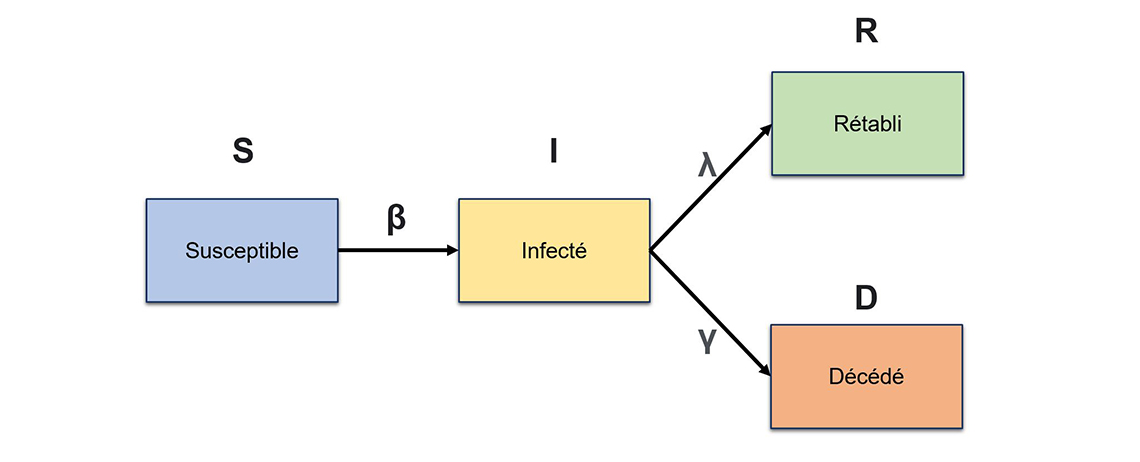


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

# Fonction de la méthode d'Euler pour le modèle SIRD
def methode_euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, t_max):
    # Calcul du nombre d'étapes
    nombre_etapes = int(t_max / dt)
    
    # Création des listes pour stocker les résultats
    S = [0.0] * (nombre_etapes + 1)  # Inclure l'étape initiale
    I = [0.0] * (nombre_etapes + 1)
    R = [0.0] * (nombre_etapes + 1)
    D = [0.0] * (nombre_etapes + 1)
    t = [0.0] * (nombre_etapes + 1)
    
    # Initialisation des valeurs initiales
    S[0] = S0
    I[0] = I0
    R[0] = R0
    D[0] = D0
    t[0] = 0.0
    
    # Boucle pour appliquer la méthode d'Euler
    for i in range(1, nombre_etapes + 1):
        # Calcul des variations
        dS = -beta * S[i - 1] * I[i - 1] * dt
        dI = (beta * S[i - 1] * I[i - 1] - gamma * I[i - 1] - mu * I[i - 1]) * dt
        dR = gamma * I[i - 1] * dt
        dD = mu * I[i - 1] * dt
        
        # Mise à jour des valeurs
        S[i] = S[i - 1] + dS
        I[i] = I[i - 1] + dI
        R[i] = R[i - 1] + dR
        D[i] = D[i - 1] + dD
        t[i] = t[i - 1] + dt
    
    # Retourner les résultats
    return t, S, I, R, D





### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [2]:
# Paramètres de simulation
beta = 0.5  # Taux de transmission
gamma = 0.15  # Taux de guérison
mu = 0.015  # Taux de mortalité
S0 = 0.99  # Pourcentage initial de susceptibles
I0 = 0.01  # Pourcentage initial d'infectés
R0 = 0.0  # Pourcentage initial de rétablis
D0 = 0.0  # Pourcentage initial de décès
dt = 0.01  # Pas de temps (en jours)
t_max = 100  # Durée de la simulation (en jours)

# Simulation
temps, susceptibles, infectes, retablis, decedes = methode_euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, t_max)

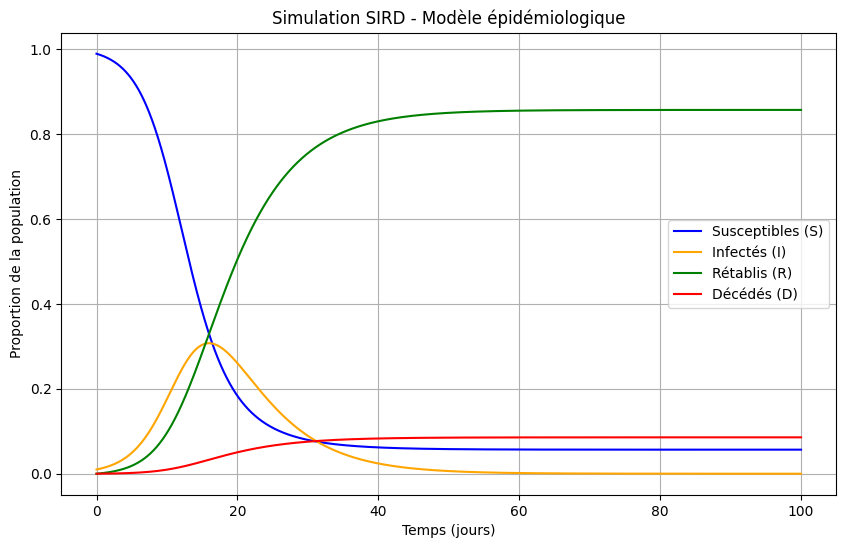

In [3]:
# Tracé des courbes
plt.figure(figsize=(10, 6))
plt.plot(temps, susceptibles, label="Susceptibles (S)", color="blue")
plt.plot(temps, infectes, label="Infectés (I)", color="orange")
plt.plot(temps, retablis, label="Rétablis (R)", color="green")
plt.plot(temps, decedes, label="Décédés (D)", color="red")
plt.title("Simulation SIRD - Modèle épidémiologique")
plt.xlabel("Temps (jours)")
plt.ylabel("Proportion de la population")
plt.legend()
plt.grid()
plt.show()


## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [4]:
# Lecture du fichier CSV
dataset_path = "sird_dataset.csv"
data = pd.read_csv(dataset_path, encoding='utf-8')


In [5]:
"""  Justification du choix de la MSE
La MSE est un bon choix pour mesurer la différence entre les données observées et prédites 
parce qu'elle est simple à calculer et facile à comprendre. 
Elle punit les grandes erreurs plus sévèrement, ce qui aide à rendre le modèle plus précis. 
Contrairement à la Cross-Entropy, qui est utilisée pour des problèmes de classification """


# Renommer les colonnes pour enlever les accents
data.columns = ['Jour', 'Susceptibles', 'Infectes', 'Retablis', 'Deces']

# Affichage des premières lignes du dataset
print(data.head())

# Fonction de coût (MSE - Mean Squared Error)
def mse_total(observed, predicted):
    mse_s = np.mean((np.array(observed['Susceptibles']) - np.array(predicted[0])) ** 2)
    mse_i = np.mean((np.array(observed['Infectes']) - np.array(predicted[1])) ** 2)
    mse_r = np.mean((np.array(observed['Retablis']) - np.array(predicted[2])) ** 2)
    mse_d = np.mean((np.array(observed['Deces']) - np.array(predicted[3])) ** 2)
    return (mse_s + mse_i + mse_r + mse_d) / 4

# Définir les valeurs possibles pour les paramètres
beta_values = np.linspace(0.25, 0.5, 5)
gamma_values = np.linspace(0.08, 0.15, 5)
mu_values = np.linspace(0.005, 0.015, 5)

best_params = None
best_loss = float("inf")

   Jour  Susceptibles  Infectes  Retablis     Deces
0     0      0.998894  0.003197 -0.002455 -0.004622
1     1      0.991526  0.000409  0.010702  0.008857
2     2      0.982164  0.011018  0.004865 -0.001515
3     3      0.988132  0.008969 -0.006308  0.003571
4     4      0.971090  0.007307  0.005403  0.004894


In [6]:
# Utiliser Grid Search pour trouver les meilleurs paramètres
for beta, gamma, mu in product(beta_values, gamma_values, mu_values):
    t_pred, S_pred, I_pred, R_pred, D_pred = methode_euler_sird(beta, gamma, mu, S0, I0, R0, D0, dt, t_max)
    
    # Échantillonner les données prédites pour correspondre aux jours entiers
    indices = np.arange(0, len(t_pred), int(1/dt))[:len(data)]
    S_sampled = np.array(S_pred)[indices]
    I_sampled = np.array(I_pred)[indices]
    R_sampled = np.array(R_pred)[indices]
    D_sampled = np.array(D_pred)[indices]
    
    loss = mse_total(data, [S_sampled, I_sampled, R_sampled, D_sampled])
    
    if loss < best_loss:
        best_loss = loss
        best_params = (beta, gamma, mu)

print(f"Meilleurs paramètres : beta={best_params[0]}, gamma={best_params[1]}, mu={best_params[2]}")


Meilleurs paramètres : beta=0.3125, gamma=0.11499999999999999, mu=0.009999999999999998


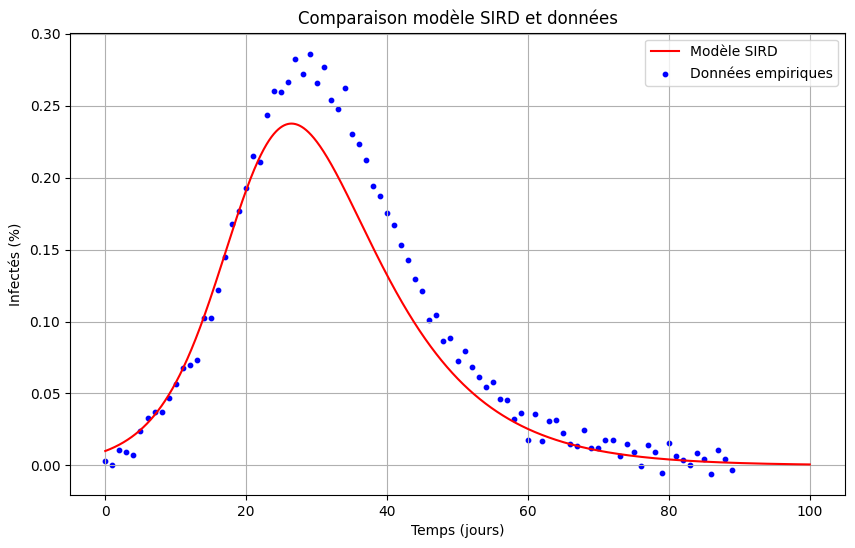

In [7]:
# Simulation avec les meilleurs paramètres
temps_opt, S_opt, I_opt, R_opt, D_opt = methode_euler_sird(*best_params, S0, I0, R0, D0, dt, t_max)

# Tracer les courbes des données observées et du modèle théorique optimal
plt.figure(figsize=(10, 6))
plt.plot(temps_opt, I_opt, label="Modèle SIRD", color="red")
plt.scatter(data["Jour"], data["Infectes"], label="Données empiriques", color="blue", s=10)
plt.xlabel("Temps (jours)")
plt.ylabel("Infectés (%)")
plt.title("Comparaison modèle SIRD et données")
plt.legend()
plt.grid()
plt.show()


### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

In [ ]:
# Si 𝑅 0 > 1  : L'épidémie se propage. Chaque personne infectée transmet la maladie à plus d'une autre personne en moyenne. Cela signifie que le nombre de cas augmente
# Si 𝑅 0 < 1  : L'épidémie décroît naturellement. Chaque personne infectée transmet la maladie à moins d'une autre personne en moyenne. Cela signifie que le nombre de cas diminue

2.

R0 initial : 2.50


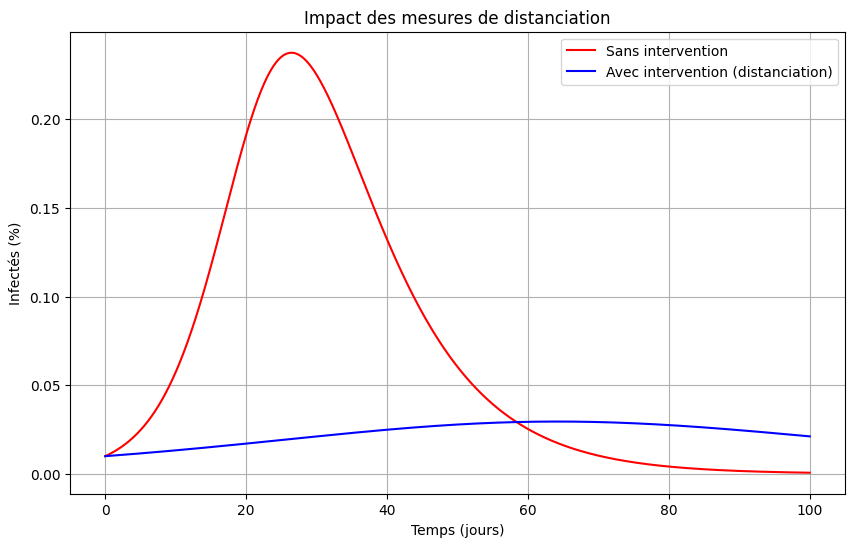

R0 après intervention : 1.25


In [8]:
# Fonction pour calculer R0
def calcul_r0(beta, gamma, mu):
    return beta / (gamma + mu)

# Calcul de R0 initial
R0_initial = calcul_r0(best_params[0], best_params[1], best_params[2])
print(f"R0 initial : {R0_initial:.2f}")

# Réduction de beta de 50% pour l'intervention
beta_reduced = best_params[0] * 0.5

# Simulation avec intervention (réduction de beta)
temps_int, S_int, I_int, R_int, D_int = methode_euler_sird(beta_reduced, best_params[1], best_params[2], S0, I0, R0, D0, dt, t_max)

# Tracer les courbes avec et sans intervention
plt.figure(figsize=(10, 6))
plt.plot(temps_opt, I_opt, label="Sans intervention", color="red")
plt.plot(temps_int, I_int, label="Avec intervention (distanciation)", color="blue")
plt.xlabel("Temps (jours)")
plt.ylabel("Infectés (%)")
plt.title("Impact des mesures de distanciation")
plt.legend()
plt.grid()
plt.show()

# Calcul de R0 après intervention
R0_reduced = calcul_r0(beta_reduced, best_params[1], best_params[2])
print(f"R0 après intervention : {R0_reduced:.2f}")
